In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Linear_Regression():
 
  #Splitting original training data to train and dev set
  def train_dev_split(self,X,Y,train_size):
    m_=int(train_size*X.shape[0])
    X_train=X[:m_,:]
    X_dev=X[m_:,:]
    Y_train=Y[:m_]
    Y_dev=Y[m_:] 
    return X_train,Y_train,X_dev,Y_dev

  #Z score normalization
  def Z_score_standardize(self,X,X_train_):
    Mean=np.mean(X_train_,axis=0)
    std=np.std(X_train_,axis=0)
    std[std==0]=1
    return (X-Mean)/std

  def min_max_normalize(self,X,X_train_):
    Min=np.min(X_train_,axis=0)
    Max=np.max(X_train_,axis=0)
    Range=Max-Min
    Range[Range==0]=1
    return (X-Min)/Range

  
  #Batch gradient descent
  def Batch_GD(self,X_train,Y_train,iterations=7,learning_rate=0.6,L2_regularization_term=0,Exp_learning_rate_decay=None,Feature_Scaling="Z_score_standardization",validation=False,X_dev=np.array([]),Y_dev=np.array([])): 
    alpha=learning_rate
    alpha1=alpha
    lamda=L2_regularization_term
    self.iterations=iterations
    self.validation=validation
    self.Y_train=Y_train.reshape(-1,1)
    self.X_train_=np.copy(X_train)  
    if Feature_Scaling=="Z_score_standardization":
      self.X_train_n=self.Z_score_standardize(X_train,self.X_train_)
    elif Feature_Scaling=="min_max_normalization":
      self.X_train_n=self.min_max_normalize(X_train,self.X_train_)
    else:
      self.X_train_n=X_train
    m_train,n_train=self.X_train_n.shape  
    self.w=np.random.randn(n_train,1)  
    self.b=np.random.randn()  
    self.J_train_list=[] 
    self.R2_train_list=[]
    if self.validation:
      if X_dev.size>0 and Y_dev.size>0:
        self.X_dev_=np.copy(X_dev)
        self.J_dev_list=[]
        self.R2_dev_list=[]
        self.Y_dev=Y_dev.reshape(-1,1)
        if Feature_Scaling=="Z_score_standardization":
          self.X_dev_n=self.Z_score_standardize(X_dev,self.X_train_)
        elif Feature_Scaling=="min_max_normalization":
          self.X_dev_n=self.min_max_normalize(X_dev,self.X_train_)
        else:
          self.X_dev_n=X_dev
      else:
        print("Please give dev data in function call" )
        return 

    for i in range(self.iterations):
      Y_pred_train=self.predict(self.X_train_n)
      self.J_train_list.append(self.MSE(self.Y_train,Y_pred_train))
      self.R2_train_list.append(self.R2(self.Y_train,Y_pred_train))
      if self.validation:
        Y_pred_dev=self.predict(self.X_dev_n)
        self.J_dev_list.append(self.MSE(self.Y_dev,Y_pred_dev))
        self.R2_dev_list.append(self.R2(self.Y_dev,Y_pred_dev))
      dJ_dw=(1/m_train)*(self.X_train_n.T@(Y_pred_train-self.Y_train))+((lamda/m_train)*self.w)
      dJ_db=(1/m_train)*(np.sum(Y_pred_train-self.Y_train))
      self.w -= alpha*dJ_dw
      self.b -= alpha*dJ_db     
      if Exp_learning_rate_decay:
        alpha=((Exp_learning_rate_decay)**i)*alpha1

    Y_pred_train=self.predict(self.X_train_n)
    self.J_train_list.append(self.MSE(self.Y_train,Y_pred_train))
    self.R2_train_list.append(self.R2(self.Y_train,Y_pred_train))
    if self.validation:
      Y_pred_dev=self.predict(self.X_dev_n)
      self.J_dev_list.append(self.MSE(self.Y_dev,Y_pred_dev))
      self.R2_dev_list.append(self.R2(self.Y_dev,Y_pred_dev))

  #Printing some results   
  def Results(self,MSE_learning_curve=True,R2_learning_curve=True,Single_feature_vs_label=True,Table_showing_predicted_vs_actual=True):
    li=np.arange(0,self.iterations+1)
    if MSE_learning_curve:
      print("Final MSE of training data is: ",self.J_train_list[-1],"\n")
      if self.validation:
        print("Final MSE of dev data is: ",self.J_dev_list[-1],"\n")
      plt.plot(li,self.J_train_list,color="blue",label="Training Cost")
      if self.validation:
        plt.plot(li,self.J_dev_list,color="Red",label="Dev cost")
      plt.xlabel("Iterations")
      plt.ylabel("Cost")
      plt.title("Cost vs Iterations curve")
      plt.legend()
      plt.show()
      print("\n")
   
    if R2_learning_curve:
      print("Final R2 of training data is: ",self.R2_train_list[-1])
      print("\n")
      if self.validation:
        print("Final R2 of dev data is: ",self.R2_dev_list[-1])
        print("\n")
      plt.plot(li,self.R2_train_list,color="blue",label="Train")
      if self.validation:
        plt.plot(li,self.R2_dev_list,color="Red",label="Dev")
      plt.xlabel("Iterations")
      plt.ylabel("R2")
      plt.title("R2 vs Iterations curve")
      plt.legend()
      plt.show()
      print("\n")
    
    if Single_feature_vs_label:
      plt.scatter(self.X_train_[:20,0],self.predict(self.X_train_n)[:20,:],color="blue",label="Predicted")
      plt.scatter(self.X_train_[:20,0],self.Y_train[:20,:],color="red",label="Actual")
      plt.xlabel("Iterations")
      plt.ylabel("Label")
      plt.title("Actual and predicted value of training set vs a single label for first 20 examples")
      plt.legend()
      plt.show()
      print("\n")

      if self.validation:
        plt.scatter(self.X_dev_[:20,0],self.predict(self.X_dev_n)[:20,:],color="blue",label="Predicted")
        plt.scatter(self.X_dev_[:20,0],self.Y_dev[:20,:],color="red",label="Actual")
        plt.xlabel("Iterations")
        plt.ylabel("Label")
        plt.title("Actual and predicted value of dev set vs a single label for first 20 examples")
        plt.legend()
        plt.show()
        print("\n")

    if Table_showing_predicted_vs_actual:
      train_table=np.append(self.Y_train[:20,:],self.predict(self.X_train_n)[:20,:],axis=1)
      df=pd.DataFrame(train_table,columns=["Actual","Predicted"])
      print("A table showing predicted labels and actual label for the first 20 examples of training data: ")
      print(df)
      print("\n")

      if self.validation:
        train_table=np.append(self.Y_dev[:20,:],self.predict(self.X_dev_n)[:20,:],axis=1)
        df=pd.DataFrame(train_table,columns=["Actual","Predicted"])
        print("A table showing predicted labels and actual label for the first 20 examples of dev data: ")
        print(df)


    
  #predicting values
  def predict(self,X,normalized=True,X_=None):
    if normalized:
      return (X@self.w+self.b)
    else:
      X=self.normalized(X,self.X_train_)
      return (X@self.w+self.b)

  #Calculation mean squared errors
  def MSE(self,Y,Y_pred):
    Y=Y.reshape(-1,1)
    Y_pred=Y_pred.reshape(-1,1)
    return (1/(2*Y.shape[0]))*(np.sum(np.square(Y_pred-Y)))    

  #R2 calculation
  def R2(self,Y,Y_pred):
    Y=Y.reshape(-1,1)
    Y_pred=Y_pred.reshape(-1,1)
    R2_calc=1-((self.MSE(Y,Y_pred)*2*Y.shape[0])/np.sum(np.square(Y_pred-Y.mean())))
    return R2_calc

  

  






Final MSE of training data is:  4774.749201291516 

Final MSE of dev data is:  4753.919818710453 



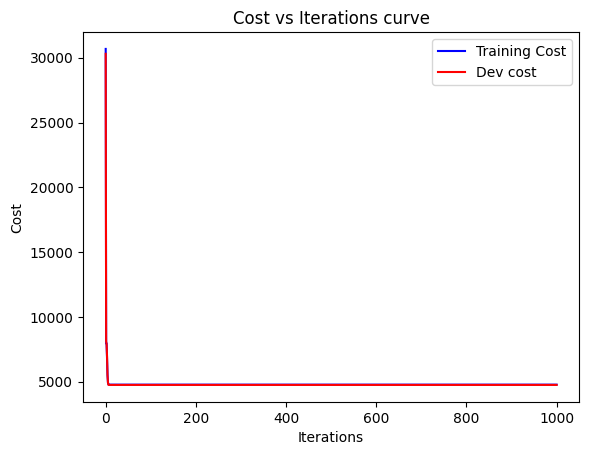



Final R2 of training data is:  0.8139222564131429


Final R2 of dev data is:  0.8122863688648053




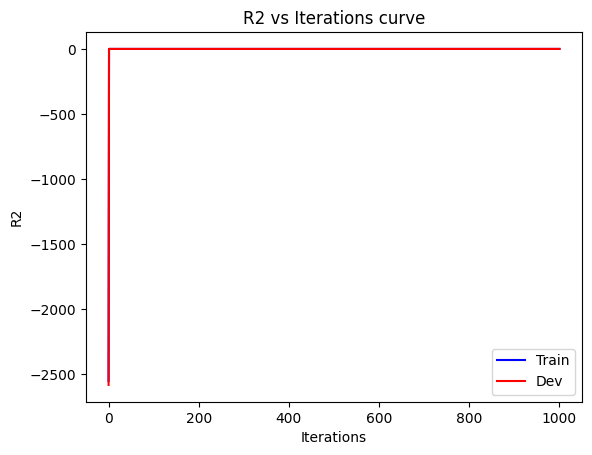

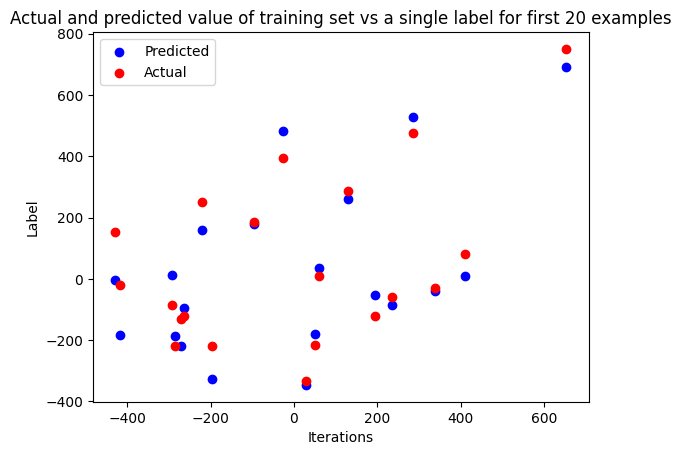

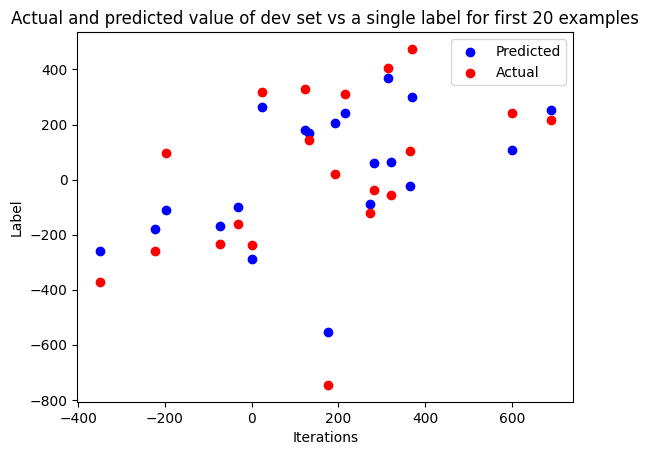



A table showing predicted labels and actual label for the first 20 examples of training data: 
        Actual   Predicted
0  -218.016231 -187.479126
1   154.140849   -5.081232
2   394.849701  483.147559
3   -83.932183   11.755531
4  -120.640357  -95.917071
5  -122.715251  -52.201114
6  -218.918438 -325.579886
7   251.717568  160.247432
8   -18.888337 -181.887471
9  -332.076822 -346.311450
10  -30.503980  -40.108348
11  184.195223  178.877249
12    8.380063   36.431379
13  475.211512  529.657719
14  -57.807830  -84.216584
15 -131.075207 -220.179098
16  287.367127  260.347315
17  750.505860  693.057178
18   81.639047   10.150497
19 -217.590450 -179.615157


A table showing predicted labels and actual label for the first 20 examples of dev data: 
        Actual   Predicted
0   -54.175200   64.135371
1  -260.532428 -181.097263
2   318.124772  262.167235
3   216.534174  253.891923
4   311.212334  241.070335
5  -232.479592 -170.131438
6  -745.773817 -555.337337
7  -236.761164 -288.222172
8

In [9]:
df_arr=np.array(pd.read_csv("/content/drive/MyDrive/Woc/linear_train.csv"))
X=df_arr[:,1:-1]
Y=df_arr[:,-1].reshape(-1,1)
Model=Linear_Regression()
X_train,Y_train,X_dev,Y_dev=Model.train_dev_split(X,Y,0.8)
Model.Batch_GD(X_train,Y_train,iterations=1000,learning_rate=1,L2_regularization_term=0,Exp_learning_rate_decay=0.9,Feature_Scaling="Z_score_standardization",validation=True,X_dev=X_dev,Y_dev=Y_dev)
Model.Results()

In [ ]:
a=np.array([[1,2,0,5]])
print(np.count(a))
df=pd.DataFrame(a,columns=["a","b","c","d"])
df

AttributeError: ignored

In [4]:
0.95**1000

5.2918227477448005e-23

In [5]:
Model.J_train_list

[30372.989994144293,
 8112.24005345277,
 8111.3911435764885,
 7482.970041957896,
 6533.568480095229,
 5675.368034841572,
 5131.982067001909,
 4882.150435784495,
 4798.564861716132,
 4778.509440403438,
 4775.152474185596,
 4774.776696019252,
 4774.7502797988145,
 4774.749221876086,
 4774.749201427391,
 4774.749201291617,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291517,
 4774.749201291516,
 4774.749201291517,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291517,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291517,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291516,
 4774.749201291517,
 4774.749201291517,
 4774.749201291517,
 4774.749201291517,
 4774.749201291517,
 4774.749201291517,
 4774.749201291517,
 4774.749201291517,
 4774.749201291516,
 4774.749201291517,
 4774.749201291517,
 4774.749201291516,
 4774.749201291516

In [7]:
Model.J_train_list

[30358.90599823885,
 8266.041705179208,
 8265.629294534117,
 6034.721772288821,
 4873.97018985565,
 4774.808752921904,
 4774.751141731267,
 4774.749432222352,
 4774.7492538803735,
 4774.749219196356,
 4774.749209298178,
 4774.749205637917,
 4774.749204010714,
 4774.74920318277,
 4774.749202716705,
 4774.749202433418,
 4774.74920225077,
 4774.749202127506,
 4774.749202041305,
 4774.749201979317,
 4774.749201933751,
 4774.749201899671,
 4774.749201873829,
 4774.749201854021,
 4774.749201838705,
 4774.749201826781,
 4774.749201817446,
 4774.749201810107,
 4774.749201804317,
 4774.749201799735,
 4774.749201796101,
 4774.749201793216,
 4774.74920179092,
 4774.749201789092,
 4774.749201787635,
 4774.749201786472,
 4774.749201785544,
 4774.7492017848035,
 4774.749201784211,
 4774.749201783739,
 4774.749201783361,
 4774.749201783058,
 4774.749201782817,
 4774.7492017826235,
 4774.74920178247,
 4774.749201782346,
 4774.749201782248,
 4774.749201782169,
 4774.749201782105,
 4774.749201782055,
 4

In [8]:
0.8**1000

1.2302319221611854e-97